<a href="https://colab.research.google.com/github/ankur150/ML-Projects/blob/main/AdvertisingSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

Import Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the data set

In [38]:
dataset = pd.read_excel("advertising_sales_data.xlsx")
# Display the first few rows
dataset.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


Handling Missing Values

In [39]:
missing_values = dataset.isnull().sum()  # Checks the number of missing values per column
missing_values

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


In [40]:
# Since there are 2 missing values in the radio column, we are going to impute the mean value into these places.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
dataset['Radio'] = imputer.fit_transform(dataset[['Radio']])
dataset.isnull().sum()

,0
Campaign,0
TV,0
Radio,0
Newspaper,0
Sales,0


#Average amount spent on TV advertising

In [41]:
average_tv_spending = dataset["TV"].mean()
print(average_tv_spending)

147.0425


#Correlation between radio advertising expenditure and product sales

Positive correlation (+1) → When one variable increases, the other also increases.

Negative correlation (-1) → When one variable increases, the other decreases.

No correlation (0) → No relationship between the variables.

In [42]:
# Calculate correlation between 'Radio' and 'Sales'
radio_sales_correlation = dataset["Radio"].corr(dataset["Sales"])
print(radio_sales_correlation)

0.3496507429302875


#Advertising medium thar has the highest impact on sales

In [43]:
# Compute correlation matrix excluding 'Campaign' column
correlation_matrix = dataset.drop(columns=["Campaign"], errors="ignore").corr()[["Sales"]]

# Display the correlation matrix
correlation_matrix

,Sales
TV,0.901208
Radio,0.349651
Newspaper,0.157960
Sales,1.000000


From the correlation matrix, we see that TV has thee highest impact on sales.

#Multiple Linear Regression

Splitting the dataset into dependent and independent variables

In [44]:
x = dataset[["TV", "Radio", "Newspaper"]]
y = dataset["Sales"]

Splitting the dataset into test and train sets

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Training the model

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Predicting the test set

In [47]:
y_pred = regressor.predict(x_test)

Visualizing the training set results

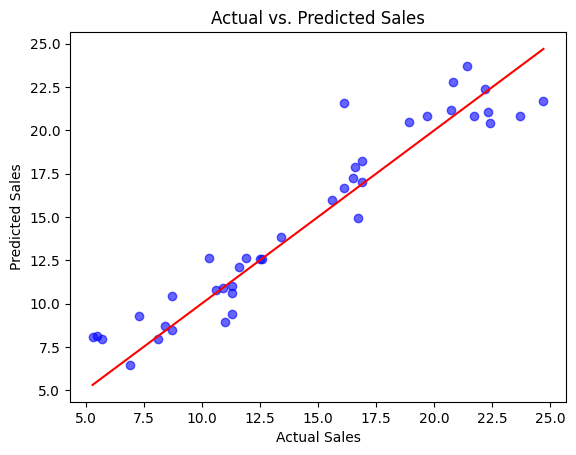

In [48]:
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

#Sales predicted for a new set of advertising expenditures

200 on TV, 40 on Radio, and 50 on Newspaper

In [50]:
from sklearn.linear_model import LinearRegression
# Define features (X) and target (y)
X = dataset[["TV", "Radio", "Newspaper"]]
y = dataset["Sales"]

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict sales for the new advertising expenditures
new_ad_spend = pd.DataFrame([[200, 40, 50]], columns=["TV", "Radio", "Newspaper"])  # Use DataFrame for consistency
predicted_sales = model.predict(new_ad_spend)

print(predicted_sales[0])

19.81151092944479


#Linear Regression Model when the dataset is normalized

Splitting the dataset into dependent and independent variables

In [51]:
x = dataset[["TV", "Radio", "Newspaper"]]
y = dataset["Sales"]

Splitting the dataset into test and train sets

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Feature Scaling using Standardization

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training the model

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Predicting the test set

In [55]:
y_pred = regressor.predict(x_test)

Visualizing the results

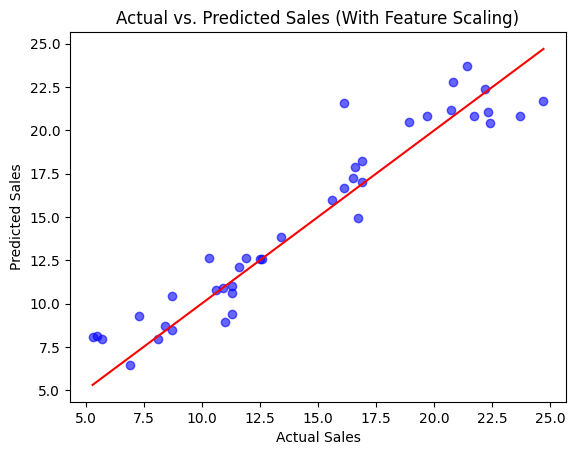

In [56]:
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (With Feature Scaling)")
plt.show()

For linear regression, normalization does not impact performance because the model is not sensitive to feature scaling. So, there is no difference in the models.

#Linear Regression Model when the dataset is reduced

Impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors

In [57]:
X_reduced = dataset[['Radio', 'Newspaper']]
y = dataset['Sales']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train a new linear regression model on the training set
model_reduced = LinearRegression()
model_reduced.fit(X_train, y_train)

# Predict sales on the test set
y_pred_test = model_reduced.predict(X_test)

Visualizing the results

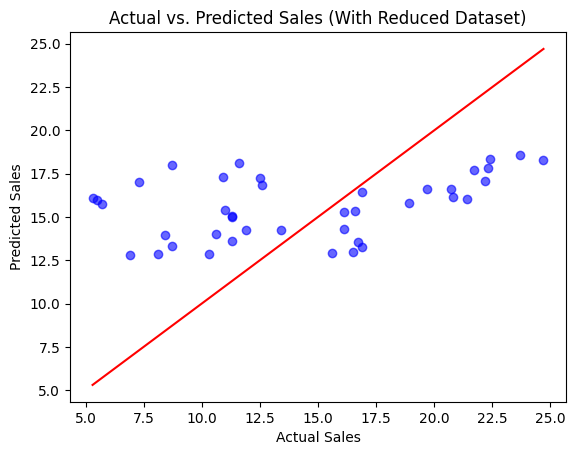

In [58]:
# Plot actual vs. predicted sales
plt.scatter(y_test, y_pred_test, alpha=0.6, color="blue")  # Fixed variable name
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (With Reduced Dataset)")
plt.show()

Using only Radio and Newspaper as predictors reduces model accuracy compared to using all three (TV, Radio, and Newspaper).